# Mean Shift Clustering

In [7]:
# Mean Shift Custering
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# importing dataset

dataset = pd.read_csv('Mall_customers.csv')
data = dataset.iloc[:,[3,4]].values
data.shape

(200, 2)

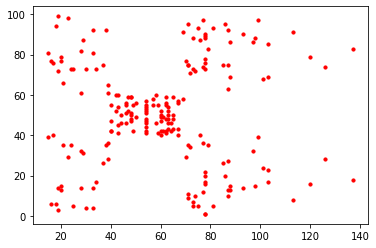

In [9]:
# visualizing dataset

plt.scatter(data[:,0], data[:,1],s = 10, c = 'red')

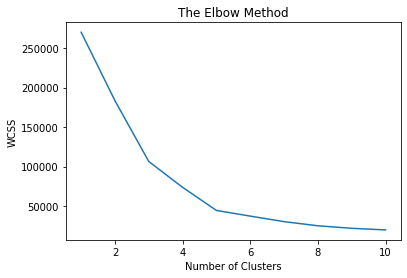

In [10]:
# Elbow method for determining the number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Fitting Mean Shift algorithim to dataset

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile= 0.15)

meanshift = MeanShift(bandwidth= bandwidth)
labels = meanshift.fit_predict(data)
np.unique(labels)


array([0, 1, 2, 3, 4], dtype=int64)

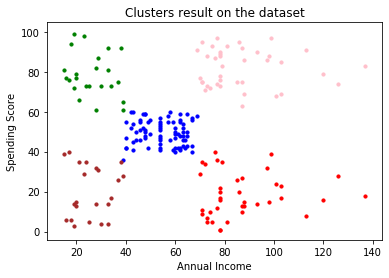

In [20]:
# Visualizing the clusters
plt.scatter(data[labels == 0,0], data[labels == 0,1], s = 10, c = 'blue')
plt.scatter(data[labels == 1,0], data[labels == 1,1], s = 10, c = 'red')
plt.scatter(data[labels == 2,0], data[labels == 2,1], s = 10, c = 'pink')
plt.scatter(data[labels == 3,0], data[labels == 3,1], s = 10, c = 'green')
plt.scatter(data[labels == 4,0], data[labels == 4,1], s = 10, c = 'brown')

plt.title('Clusters result on the dataset')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()